In [2]:
import pandas as pd
import pickle
import numpy as np

In [3]:
df = pickle.load(open('dataset_level38.pkl','rb'))

In [4]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [5]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [6]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [7]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [8]:
df['city'] = cities

In [9]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [10]:
df.drop(columns=['venue'],inplace=True)

In [11]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [12]:
df.city.unique()

array(['Melbourne', 'Victoria', 'Adelaide', 'Napier', 'Mount Maunganui',
       'Auckland', 'Southampton', 'Taunton', 'Cardiff',
       'Chester-le-Street', 'Kanpur', 'Nagpur', 'Bangalore', 'Lauderhill',
       'Dubai', 'Abu Dhabi', 'Sydney', 'Hobart', 'Wellington', 'Hamilton',
       'Bloemfontein', 'Potchefstroom', 'Barbados', 'Trinidad', 'Colombo',
       'St Kitts', 'Jamaica', 'Nelson', 'Ranchi', 'Birmingham',
       'Manchester', 'Bristol', 'Delhi', 'Rajkot', 'Thiruvananthapuram',
       'Lahore', 'Johannesburg', 'Centurion', 'Cape Town', 'Cuttack',
       'Indore', 'Mumbai', 'Dhaka', 'Sylhet', 'Karachi', 'Harare',
       'Carrara', 'Brisbane', 'Dehradun', 'Kolkata', 'Lucknow', 'Chennai',
       'Gros Islet', 'Basseterre', 'Visakhapatnam', 'Bengaluru',
       'Canberra', 'Perth', 'East London', 'Durban', 'Port Elizabeth',
       'Chandigarh', 'Hyderabad', 'Christchurch', 'Providence', 'Kandy',
       'Chattogram', 'Pune', 'Paarl', 'London', 'Nairobi', 'Nottingham',
       'King Ci

In [13]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 1500].index.tolist()
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban']

In [14]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

In [15]:
df.head(10)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
5,2,Australia,Sri Lanka,0.6,3,0,Melbourne,6
6,2,Australia,Sri Lanka,1.1,0,0,Melbourne,6
7,2,Australia,Sri Lanka,1.2,1,0,Melbourne,7
8,2,Australia,Sri Lanka,1.3,0,0,Melbourne,7
9,2,Australia,Sri Lanka,1.4,0,0,Melbourne,7


In [16]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [17]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df.head(10)

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
5,2,Australia,Sri Lanka,0.6,3,0,Melbourne,6,0,6,6
6,2,Australia,Sri Lanka,1.1,0,0,Melbourne,6,1,1,7
7,2,Australia,Sri Lanka,1.2,1,0,Melbourne,7,1,2,8
8,2,Australia,Sri Lanka,1.3,0,0,Melbourne,7,1,3,9
9,2,Australia,Sri Lanka,1.4,0,0,Melbourne,7,1,4,10


In [18]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [19]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [21]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

In [22]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [23]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [24]:
df['last_five'] = last_five

In [25]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


In [26]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [27]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [28]:
final_df.dropna(inplace=True)

In [29]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [30]:
final_df = final_df.sample(final_df.shape[0])

In [31]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
32538,Australia,Pakistan,Melbourne,92,38,4,6.731707,23.0,127
55240,England,Australia,Cardiff,172,8,6,9.214286,58.0,182


In [32]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
columns=X_train.columns
columns

Index(['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left',
       'wickets_left', 'crr', 'last_five'],
      dtype='object')

In [34]:
X.to_csv('Xdatast.csv',index=False)
y.to_csv('ydatast.csv',index=False)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score

In [36]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [58]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1200,learning_rate=0.1,max_depth=8,seed=20,random_state=1))
])

In [60]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(r2_score(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
print('RMSE: ',(mse**(1/2.0)))
print(mean_absolute_error(y_test,y_pred))

0.9885915439946731
RMSE:  3.4436194470516974
1.9909474544111485


In [95]:
arr=np.array(['India','Australia','Bangalore','144','12','6','8','52'])
arr=arr.reshape(1,8)

test=pd.DataFrame(arr,columns=columns)
test

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
0,India,Australia,Bangalore,144,12,6,8,52


In [96]:

output=pipe.predict(test)
round(output[0])

166

In [97]:
pickle.dump(pipe,open('pipe37.pkl','wb'))

In [ ]:
print(y_test)

In [98]:
final_df.describe()

,current_score,balls_left,wickets_left,crr,last_five,runs_x
count,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000,48645.000000
mean,94.721307,45.936026,6.735019,7.621054,38.751711,160.871600
std,41.838085,26.539972,2.027372,1.733534,11.784644,32.534451
min,8.000000,0.000000,0.000000,1.600000,8.000000,58.000000
25%,61.000000,23.000000,5.000000,6.409091,30.000000,139.000000
50%,90.000000,46.000000,7.000000,7.531915,38.000000,160.000000
75%,123.000000,69.000000,8.000000,8.700000,46.000000,183.000000
max,263.000000,98.000000,10.000000,16.600000,90.000000,263.000000


In [99]:
final_df.head()

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
48360,South Africa,Sri Lanka,Colombo,113,2,5,5.745763,39.0,115
44963,West Indies,New Zealand,Lauderhill,161,8,6,8.625000,49.0,177
6351,New Zealand,India,Rajkot,187,6,8,9.842105,47.0,196
30524,Sri Lanka,Pakistan,King City,70,68,8,8.076923,47.0,137
14070,Sri Lanka,Australia,Brisbane,85,40,4,6.375000,34.0,117


In [105]:
final_df.columns

Index(['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left',
       'wickets_left', 'crr', 'last_five', 'runs_x'],
      dtype='object')

In [106]:
sd=final_df[['batting_team','crr']].groupby(['batting_team','crr']).size().reset_index()

In [107]:
sd.drop(columns=[0],inplace=True)
sd

,batting_team,crr
0,Afghanistan,1.600000
1,Afghanistan,1.741935
2,Afghanistan,1.818182
3,Afghanistan,1.875000
4,Afghanistan,2.470588
...,...,...
24036,West Indies,15.130435
24037,West Indies,15.200000
24038,West Indies,15.428571
24039,West Indies,15.724138


In [108]:
df[df['batting_team']=='India'].mean()['crr']

7.503810812131224

In [109]:
sd.groupby(['batting_team']).median()

,crr
batting_team,
Afghanistan,6.264706
Australia,8.184129
Bangladesh,7.305639
England,7.930735
India,7.861034
New Zealand,7.950904
Pakistan,7.213483
South Africa,7.850000
Sri Lanka,7.485714


In [101]:
import seaborn as sn
import matplotlib.pyplot as plt

C:\Users\pabit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


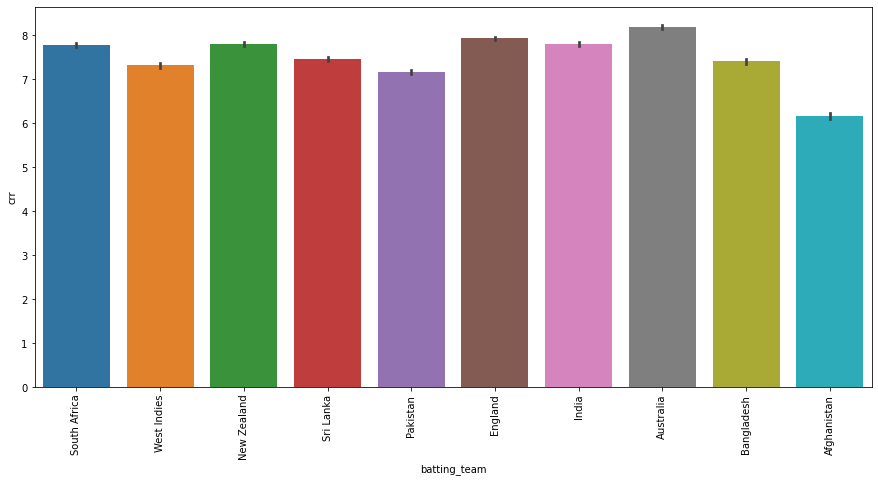

In [102]:
plt.figure(figsize=(15,7))
sn.barplot(final_df['batting_team'],final_df['crr'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\pabit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


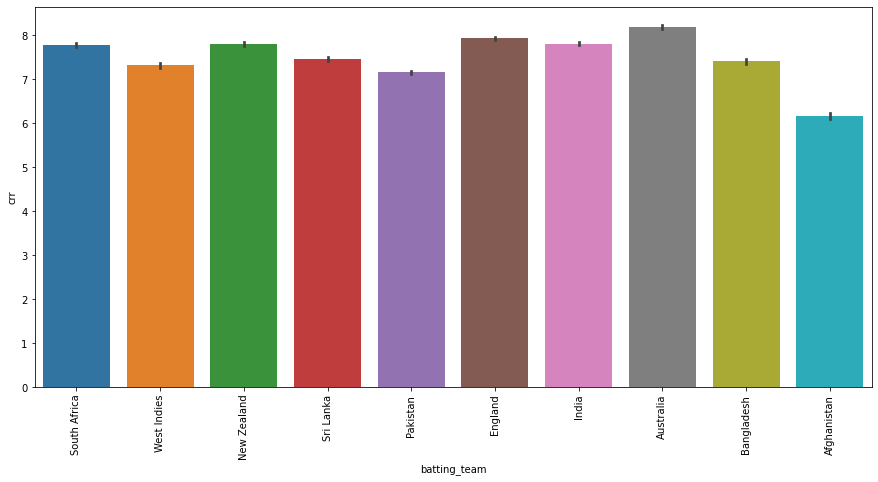

In [103]:
plt.figure(figsize=(15,7))
sn.barplot(final_df['batting_team'],final_df['crr'],estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
print(y_train)

In [ ]:
y_pred

In [104]:
import xgboost as xg
xg.__version__

'1.5.2'